<a href="https://colab.research.google.com/github/himanshutisawar13-creator/regression/blob/main/nsei_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
nsei=yf.download('^NSEI',
  start='2019-01-01',
  end='2025-08-05',
   progress=False)

/tmp/ipython-input-177753547.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nsei=yf.download('^NSEI',


In [ ]:
nsei

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2019-01-02,10792.500000,10895.349609,10735.049805,10868.849609,309700
2019-01-03,10672.250000,10814.049805,10661.250000,10796.799805,286200
2019-01-04,10727.349609,10741.049805,10628.650391,10699.700195,296600
2019-01-07,10771.799805,10835.950195,10750.150391,10804.849609,269400
2019-01-08,10802.150391,10818.450195,10733.250000,10786.250000,277700
...,...,...,...,...,...
2025-07-29,24821.099609,24847.150391,24598.599609,24609.650391,284700
2025-07-30,24855.050781,24902.300781,24771.949219,24890.400391,243900


In [ ]:
nsei.describe()

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
count,1626.000000,1626.000000,1626.000000,1626.000000,1.626000e+03
mean,17070.829249,17162.196613,16973.706359,17080.647971,3.953351e+05
std,4754.135233,4763.961469,4742.979930,4752.224146,2.017717e+05
min,7610.250000,8036.950195,7511.100098,7735.149902,0.000000e+00
25%,12046.399902,12106.387451,12005.474609,12073.212402,2.592750e+05
50%,17322.899414,17386.775391,17213.849609,17322.975586,3.279000e+05
75%,20961.475098,21021.099609,20866.037598,20961.663086,5.018750e+05
max,26216.050781,26277.349609,26151.400391,26248.250000,1.811000e+06


In [ ]:
import matplotlib.pyplot as plt

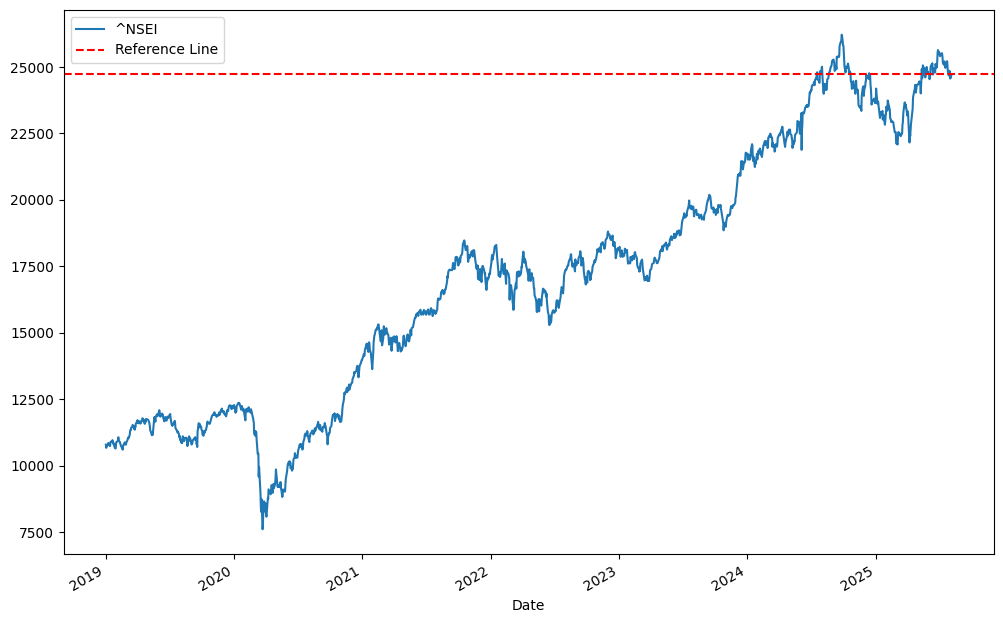

In [ ]:
nsei['Close'].plot(figsize=(12,8)).axhline(y=24720,color='r',linestyle='--',label='Reference Line')
plt.legend()
plt.show()

In [ ]:
nsei['Close_simple_rtn']=nsei.Close.pct_change()

<Axes: xlabel='Date'>

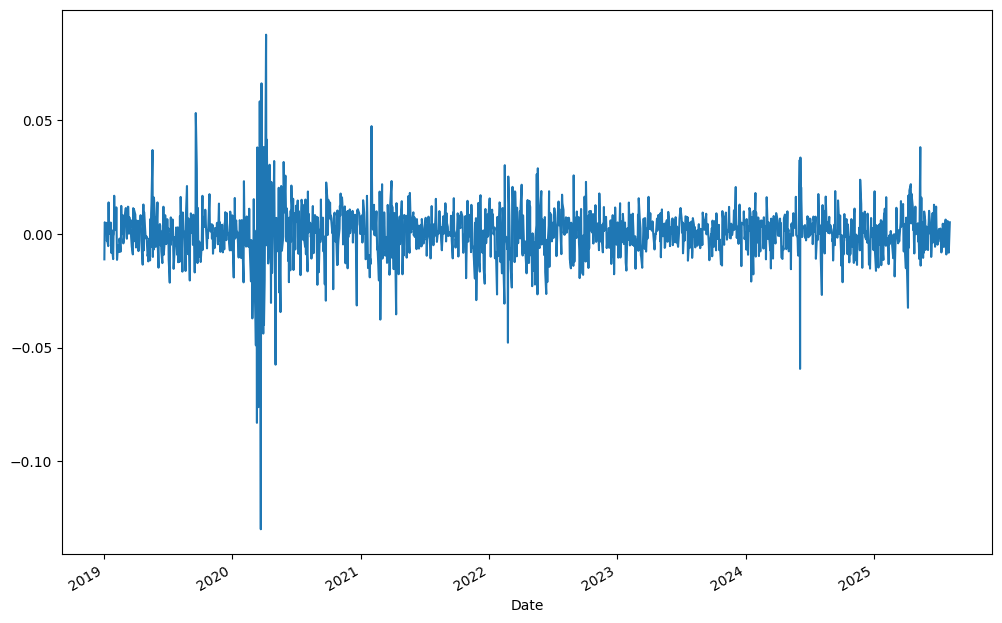

In [ ]:
nsei['Close_simple_rtn'].plot(figsize=(12,8))

In [ ]:
nsei['Close_simple_rtn']

,Close_simple_rtn
Date,
2019-01-02,NaN
2019-01-03,-0.011142
2019-01-04,0.005163
2019-01-07,0.004144
2019-01-08,0.002818
...,...
2025-07-29,0.005680
2025-07-30,0.001368
2025-07-31,-0.003488


In [ ]:
nsei['Close_simple_rtn'].std()

0.01133724678035313

In [ ]:
nsei['Close_simple_rtn'].describe()

,Close_simple_rtn
count,1625.000000
mean,0.000574
std,0.011337
min,-0.129805
25%,-0.004498
50%,0.000821
75%,0.006370
max,0.087632


In [ ]:
nsei['Close_simple_rtn'].corr(nsei['Close_simple_rtn'].shift(0))

np.float64(1.0)

In [ ]:
#Calculate skewness and kurtosis
skewness=nsei['Close_simple_rtn'].skew()
kurtosis=nsei['Close_simple_rtn'].kurtosis()

#print the results
print('Skewness:', skewness)
print('Kurtosis:' ,kurtosis)

Skewness: -1.1695759336632587
Kurtosis: 18.866632763268488


In [ ]:
#Calculate skewness and kurtosis
skewness1=nsei['Close'].skew()
kurtosis1=nsei['Close'].kurtosis()

#print the results
print('Skewness:', skewness1)
print('Kurtosis:' ,kurtosis1)

Skewness: Ticker
^NSEI    0.127364
dtype: float64
Kurtosis: Ticker
^NSEI   -1.086902
dtype: float64


In [ ]:
import seaborn as Sns

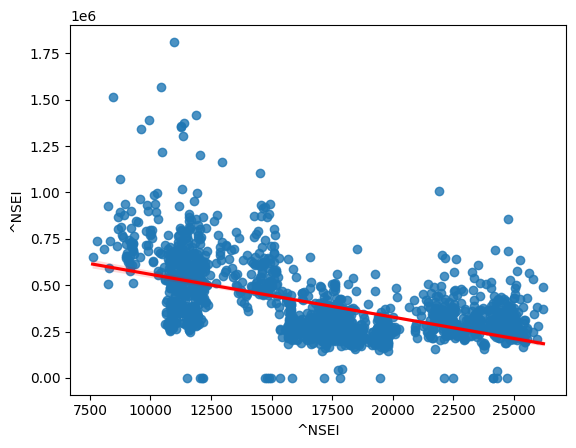

In [ ]:
ax= Sns.regplot(x='Close',y='Volume',data=nsei,
line_kws={'color':'red'})


In [ ]:
corr=nsei[['Close','Volume']].corr('pearson')

In [ ]:
corr

,Price,Close,Volume
,Ticker,^NSEI,^NSEI
Price,Ticker,,
Close,^NSEI,1.000000,-0.543255
Volume,^NSEI,-0.543255,1.000000
